<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_07_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discriminative vs. Generative Methods for Classification

* **Discriminative model (conditional or backward model)**

A discriminative method stablishes a model that maps a datapoint ${\bf x}$ to $y$. Such a model is either a pure or traditional discriminative model if it is deterministic and aims to fit the training set in some optimall way, or a conditional model if it is probabilistic in nature, such as the conditional probability $p(y\vert{\bf x})$. The model parameters in ${\bf\theta}$ are obtained in some optimal way based on the training set. Then prediction can be made for any unlabeled ${\bf x}$ in terms of the corresponding $y$. As a discriminative method aims at finding the decision boundaries between different classes based on the training set, only those data samples that are close to the boundaries play an important role, while all other samples farther away from the boundaries are mostly ignored.

Typical discrimiative methods include:

    - K-nearest neighbors algorithm
    - Linear and logistic regressions
    - Support vector machines
    - Perceptrons and Neural networks
    - Decision trees and random forests

* **Generative model (forward model)**

A generative method first assumes certain probabilistic model for the underlying structure of the observed data, such the joint probability $p({\bf x},y\vert{\bf\theta})$ based on all data samples available. It then estimates the parameter ${\bf\theta}$ of the model based on the training dataset, and obtains the conditional probability $p(y\vert{\bf x})$ (by Bayes' theorem) based on which a prediction can be made for any unlabeled ${\bf x}$ to find the corresponding $y$. As in general the generative method is based on some probabilistic model of the data, it can be used for unsupervised learning as well as supervised.

Typical generative methods include:

    - Naive Bayes classifiers
    - Gaussian mixture classifiers
    - Hidden Markov model

**comparison**

* The **discriminative** methods find the decision boundary in the feature space directly based on the data points in the training set, in general they
  - are simpler than the generative approach requiring problem-specific knowledge for building models of the data,
  - are effective in producing accurate result when the dataset is large
  - provide no insight or interpretation regarding the data and no uncertainty estimate

* The **generative** methods first establish a probabilistic model for the underlying structure of the data as an effort to explain how the data was generated, and then finds the decision boundary based the model. In general, they
  - allow the use of problem-specific knowlege for building the model,
  - can provide explanation and interpretation of the data,
  - may be less prone to overfitting than a discriminative method,
  - can provide uncertainty estimate
  - may not be as accurate as the discriminative methods if the model does not fit the dataset well.

#Concepts of probability theory we will need

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
key concepts of probability
</font>

<font face="helvetica" color="black" size="3">

* elementary outcome
* probability
  - conditional probability
  - joint probability
*probability distribution
  
</font>

<hr size="2" noshade="noshade" color="black"/>

In this lecture we are in the realm of probability theory.
Let me remind you its key concepts.

The atoms of every probability theory problem are elementary outcomes.
But the key concept is one of an event -- it's a complex outcome that can include multiple elementary outcomes.
Formally it's a subset of the set of the elementary outcomes.

In plain words elementary events are collection of outcomes that should be
* mutually exclusive
* collectively exhostive
* at the right "granularity"









In [ ]:
#@title Elementary outcomes & events
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/elementary_outcomes_and_events.svg'>
</img>

**Example "dice rolling"**

$\Omega$ | description
---|---
{1,2,5,6} | Not exhaustive
{1,2,3,4,5,6} | Seems good for most purposes
{divisible by 2, divisible by 3, not divisible by 2 or 3} | Not mutually exclusive
{1 and it rains, 1 and no rain,..., 6 and no rain} | May be too granular

**"$\sigma$"-algebra**

Let $X$ be some set, and let $\mathcal{P}(X)$ represent its power set. Then a subset $\Sigma \subseteq \mathcal{P}(X)$ is called a "$\sigma$"-algebra if it satisfies the following three properties:

* $X$ is in $\Sigma$, and $X$ is considered to be the universal set in the following context.
* $\Sigma$ is closed under complementation: If $A$ is in $\Sigma$, then so is its complement $X\setminus A$.
* $\Sigma$ is closed under countable unions: If $A_1$, $A_2$, $A_3$, ... are in $\Sigma$, then so is $A = A_1 \cup A_2 \cup \cdots$.

From these properties, it follows that the $\sigma$-algebra is also closed under countable intersection (by applying De Morgan's laws).

It also follows that the $\varnothing$ is in $\Sigma$ as complement of the whole $X$.  Moreover, since $\left\{X, \varnothing\right\}$ satisfies all conditions it is the smallest possible $\sigma$-algebra on $X$.  The largest possible $\sigma$-algebra on $X$ is $\mathcal{P}(X) = 2^X$.


In [ ]:
#@title Complement and union
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/complement_and_union.svg'>
</img>

**Measure**

Let $X$ be a set and $\Sigma$ a Sigma-algebra over $X$. A function $\mu$ from $\Sigma$ to the extended real number line $\bar{\mathbb{R}}$ is called a "measure" if it satisfies the following properties:

* Non-negativity: $\forall E \in \Sigma: \mu(E) \geq 0$.
* Null empty set: $\mu(\varnothing)=0$.
* Countable additivity: For all countable collections $\left. E_k\right|_{k=0}^\infty$ of pairwise disjoint sets in $\Sigma$:
$\mu\left(\bigcup_{k=1}^\infty E_k\right)=\sum_{k=1}^\infty \mu(E_k)$.

If at least one set $E$ has finite measure, then the requirement that $\mu(\varnothing)=0$ is met automatically. Indeed, by countable additivity,
$\mu(E)=\mu(E \cup \varnothing) = \mu(E) + \mu(\varnothing),$ and therefore $\mu(\varnothing)=0$.

**Probability**

A measure defined on $\sigma$-algebra $\Sigma$ such that $\mu(X) = 1$ is a probability measure.

We assign probabilities to events.
Two events may happen at once.
For example if we draw dice we can have an even number and a number divisible by $4$ simultaneously.

We can ask what is the probability of event $A$ to happen if we know that event $B$ has happened.
In a way we pretend that event $B$ has happened but we didn't notice whether $A$ has also happened and want to guess.
The probability of $A$ given $B$ is called the conditional probability $P(A \mid B)$.
Events can also be joined together (they are sets after all) and we can quire for a probability of the joint event $P(A\cap B)$ or $P(A, B)$.

In [ ]:
#@title Joint events
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/joint_events.svg'>
</img>

**Our main tools:**
* Multiplication rule $P(A\cap B)=P(A)\cdot P(B)$
* Total probability theorem $P(B) = \sum_i P(A_i) P(B|A_i)$ for partition $A_i$ of $X$ ($A_i$ in Sigma-algebra and measurable)
* Bayes theorem (a bit later)

If
$$
P(A\cap B)=P(A)\cdot P(B).
$$
events $A$ and $B$ are called **independent**.

In other words

$$
\require{action}
\frac{P(A\cap B)}{P(B)}=\frac{P(A)}{\toggle{P(\Omega)}{1}\endtoggle},
$$

where $\Omega$ is the universum. That means that if $A$ and $B$ are independent the fraction of outcomes that support $A$ in $B$ equals the fraction of outcomes that support $A$ in $\Omega$.  

Informally independent events refer to unrelated aspects of the phenomenon we are observing.
*Observing $A$ does not provide any new information on $B$*.
Don't confuse conditional probability with joint probability.
Conditional and joint probabilities are connected by formula

$$
\def\q{\unicode{x201C}}
\def\Q{\unicode{x201D}}
P(A|B)=\frac{P(A\cap B)}{P(B)}.
$$

If $A$ and $B$ are independent

$$
P(A|B)=P(A).
$$

This means that the fact that $B$ occurred doesn't influence the probability that $A$ occurred as well.

If
$$
P(A\cap B | C)=P(A|C)\cdot P(B|C).
$$
events $A$ and $B$ are called **conditionally independent** with condition $C$.

* Conditioning may affect independence

A collection of events is independent if any subcollection is independent. More formally
$$
P\left(\bigcap_{i \in I\subset \{1,\dots,n\}} A_i\right) = \prod_{i \in I\subset \{1,\dots,n\}} P(A_i)
$$

* pairwise independent events nay be **not** independent together.

Consider 2 coin tosses.
$$
\begin{array}{cc}
HH(1/4) & HT(1/4) \\
TH(1/4) & TT(1/4) \\
\end{array}
$$
Consider following events
* $A_1$ first toss is H (HH, HT)
* $A_2$ second toss is H (HH, TH)
* $A_3$ both tosses have the same outcome (HH, TT)
They are **pairwise independent** but all three together are **not independent**.

Be careful with the problem statement -- probabilities may heavily depend on it. Consider the problem: "King has a sibling, what is the probability that he has a sister suggesting that probabilities of boy or girl to be born are 1/2". How do royal traditions influence our views? Consider the case when boys have precedence.

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="3">

* Random variable is a function
* Result is a realization of a random variable
* Events are level sets (pre-image, fibration)
  
</font>

<hr size="2" noshade="noshade" color="black"/>

Another key concept is random variable. Sometimes it's possible to assign a number to each elementary outcome.





In [ ]:
#@title Random variable
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/random_variable.svg'>
</img>

Symbolically we can express this as
$$
\text{Random variable}=\underbrace{\Omega}_\text{universum} + \quad \underbrace{\Omega \rightarrow \mathbb{R}}_\text{function}
$$
Informally we may think that the result of the trial is the number.
We can also use analytic function (probability distribution) to assign probability to get a specific number in a trial.
The most popular distributions are Uniform, Binomial, Negative Binomial, Geometric, Gaussian, Poisson.

#Few points about random variables and distributions

**1) Random variable should be distinguished from its realization.**

Random variable is an abstract notion, realization of a random variable is just a number.
In a series of trials random variable $X$ may have realizations $0.1$, $10$ and $3$.
If we want to say that $X$ has Normal distribution it's denoted like this

$$
X \sim \mathcal{N}(\mu,\,\sigma^{2})
$$

We can also write this using pdf of $\mathcal{N}$ as
$$
P(X=x)= \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$
Here $x$ is the realization of random variable $X$.

**1') Also don't merge in your mind notions of distribution and pdf.**

Pdf - is a one of the ways to describe continuous distribution. You also describe it with CDF or somehow else.
$$
p_X(x) = P(X=x) = \mu(\{\omega\in\Omega | X(\omega)=x\})
$$

In [ ]:
#@title pdf vs cdf perspectives
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/pdf_vs_cdf_perspectives.svg'>
</img>



Discrete random variables are described by pmf (probability mass function) that assigns probability to each outcome.



In [ ]:
#@title Histogram
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/histogram.svg'>
</img>

**CDF is not redundant.**
* CDF can describe distributions that are neither discrete nor continuous
* CDF can be used to find distribution of $Y = g(X)$ (crucial in case of non-monotonic $g$, not needed for monotonic, simple formula for linear $g$): first find $F_Y(y)$, differentiate

---
**What is the defining property of the random process?**

Probability distribution function.

---

**2) Every pdf depends on variables and parameters and consists of two parts:**
* functional part (that depends on *variables* and parameters)
* normalization part (that depends *only* on parameters).

For example
$$
\underbrace{\frac{1}{\sqrt{2 \pi \sigma^2}}}_{normalization}\times \underbrace{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}_{functional}
$$

There is no need to memorize normalization: it's just a constant that could be calculated from normalization condition

$$
\int f(x, \theta)dx=1.
$$

Try to remember overall behavior of the distribution like this: *Distribution has pdf of the form $C\times x^{\text{whatever}} e^{-\frac{x}{\text{something}}}$*.


**3) Parameters of distributions may not have such clear meaning like in Gaussian distribution.**
Moreover we can reparametrize distribution $f(\theta)$ like this $$g(\alpha)=f(1/\alpha)$$ or like this $$h(\beta)=f(e^{\beta}).$$
In general, parameter is just a number that indexes distributions in certain family of distributions.


---
**Can we guess this function by datapoints we have?**

No, we always have limited amount of data, while we need infinite (in many cases uncountable) supply of data.

**What can we do then?**

* Guess the family of PDFs (human intuition or knowledge is needed) indexed with a manageable number of parameters and leave their estimation to computer (MLE).
* Estimate certain properties of the unknown distribution to get some idea on how it looks
   - properties -- any functions defined on random variable $X$, preferably meaningful.

---

**4) There are functions defined for random variable $X$ that describe its behavior, e.g.**
* expected value $\mathbb{E}{[X]}$;

$$
\begin{align}
continuous\,distr: \qquad &\mathbb{E}{[X]}=\int p(x) \, x \, dx \\
discrete \,distr: \qquad &\mathbb{E}{[X]}=\sum p_i(x_i) \, x_i
\end{align}
$$

In [ ]:
#@title Expected value (mean)
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/expected_value.svg'>
</img>

#Recap on classical probability distributions

A **probability distribution** -- a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.

There are **lots** of them!

<br>

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_07_naive_bayes/dist.png)

<br>

Probability distributions could be
* discrete
* continuous

Also they can be
* univariate (one variable)
* multivariate (multiple variables)

Key concept to build-up classical probability distributions -- picking with and without replacement

---

##Picking objects with and without replacement

Suppose we have a sack with $N$ balls: $K$ red balls and $N-K$ blue balls. The probability to pick red ball is $p=K/N$ and probability to pick blue ball is $1-p=(N-K)/N$.  We pick a a ball, remember its color and either return it to the sack or not.
If we don't return balls to the sack the probability to pick red ball in the second trial changes!
We can fix number of draws $n$ and wonder what is the probability to get $k$ red balls (get $k$ successes).
We can fix number $r$ of blue balls (failures) and ask ourselves what is the probability that it would take $n$ draws to get $r$ failures in total.





In [ ]:
#@title Picking with/without replacement
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/picking_and_replacement.svg'>
</img>


With replacements	No replacements
 of successes in constant  of draws	binomial distribution	hypergeometric distribution
 of successes in constant  of failures	negative binomial distribution	negative hypergeometric distribution

##Discrete

---
**Discrete distributions summary**

Replacement | $1$ trial | $n$ trials | try until $r$ failures
---|---|---|---
YES | Bernoulli | Binomial | Hypergeometric
NO | Bernoulli | Negative Binomial | Negative Hypergeometric
| | |
**Probability to get** | $0$ or $1$ | $k$ zeros<br> $n-k$ ones | $k$ ones<br> $r$ zeros, the last trial is zero!<br>

---

###Bernoulli $Bernoulli(p)$

$$
f(k)=
\begin{cases}
1-p \quad & \text{if} \quad k=0,\\
p \quad &{\text{if}} \quad k=1.\\
\end{cases}
$$

Can be used to represent a (possibly biased) coin toss where $1$ and $0$ would represent "heads" and "tails".
The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (so $n$ would be $1$ for such a binomial distribution). It is also a special case of the two-point distribution, for which the possible outcomes need not be $0$ and $1$.

Mean and variance are
$$
\begin{aligned}
\mathbb{E}&=p \\
\mathbb{Var}&=p(1-p)
\end{aligned}
$$

###Binomial $B(n,p)$

$$
f(k)={n \choose k}p^k(1-p)^{n-k}
$$

Binomial distribution with parameters $n$ and $p$ is the probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one (with probability $p$) or failure/no/false/zero (with probability $1-p$).
A single success/failure experiment is also called a Bernoulli trial.





In [ ]:
#@title Binomial distribution
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/binomial_choices.svg'>
</img>

Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=np \\
\mathbb{Var}&=np(1-p)
\end{aligned}
$$

If $n\to\infty$, $p\to 0$ while $np = \lambda$ and remains constant, Bernoulli process can be approximated with Poisson process.

In [10]:
#@title Binomial Distribution
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_binomial_distribution.html"
        width="990" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

###Negative binomial $NB(r,p)$

$$
f(k)={{k+r-1} \choose k} (1-p)^r p^k
$$

Negative binomial distribution is a discrete probability distribution of the number of successes in a sequence of independent and identically distributed Bernoulli trials before a specified (non-random) number of failures (denoted $r$) occurs. Do you wonder why this distribution is called negative binomial? Cause

$$
{{k+r-1} \choose k}=(-1)^k{-r \choose k} = \left( {r \choose k} \right).
$$

Double bracketed symbol is called  [Stanley's symbol](https://www.johndcook.com/blog/select_with_replacement/).


Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=\frac{pr}{1-p} \\
\mathbb{Var}&=\frac{pr}{(1-p)^2}
\end{aligned}
$$

###Hypergeometric $HG(N,K,n)$

Hypergeometric distribution arises when counting $k$ number of red balls when drawn from a sack with $K$ red balls and $N-K$ blue balls without replacement.

$$
p(k)=\frac{{K\choose k}{N-K\choose n-k}}{{N\choose n}}
$$


Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=n\frac{K}{N} \\
\mathbb{Var}&=complicated
\end{aligned}
$$

Don't be afraid of scary-looking binomial coefficients! Science can look complicated but the essence is simple!

###Negative Hypergeometric $NHG(N,K,r)$

Negative hypergeometric distribution arises when counting $k$ number trials to get $r$ failures when drawn from a sack with $K$ red balls and $N-K$ blue balls without replacement.

$$
p(k)=\frac{{k+r-1\choose k}{N-r-k\choose K-k}}{{N\choose K}}
$$

Don't be afraid of scary-looking binomial coefficients! Science can look complicated but the essence is simple!

Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=r\, \frac{K}{N-K+1} \\
\mathbb{Var}&=complicated
\end{aligned}
$$

###Multinomial $\mathcal{M}(p_1,\dots,p_k)$

---
We can generalize by altering the number of elementary outcomes -- not only $0$ and $1$ but $n$ possible results (Binomial $\rightarrow$ Multinomial, etc.)

---

The multinomial distribution is a generalization of the binomial distribution when we pick $n$ types of balls from the sack with replacement.

$$
f(x_1,\cdots,x_n)=
\begin{cases}
\frac{n!}{x_1!\cdots x_n!}p_1^{x_1}\cdots p_k^{x^k} \quad & \text{if} \quad x_1+\cdots+x_k
=n\\
0 \quad &{\text{otherwise}}
\end{cases}
$$

Don't be afraid of scary-looking factorials! Science can look complicated but the essence is simple! Wait, I've already said that :)

Mean and variance are

$$
\begin{aligned}
\mathbb{E}(X_i)   &= n p_i\\
\mathbb{Var}(X_i) &= n p_i (1-p_i)
\end{aligned}
$$

###Poisson $Pois(\lambda)$


---
Poisson is important in queue theory and physics.
$$
\boxed{\text{State }0}
\xrightarrow[\text{probability flow}]{\lambda}
\cdots
\rightarrow
\boxed{\text{State }k-1}
\xrightarrow[\text{probability flow}]{\lambda}
\boxed{\text{State }k}
\xrightarrow[\text{probability flow}]{\lambda}
\boxed{\text{State }k+1}
\rightarrow\cdots
$$
<br>
$$
\frac{d P_k}{dt} = -\lambda P_k + \lambda P_{k-1}
$$
$$
P_k(t)=\frac{\lambda^k t^k}{k!}e^{-\lambda t}
$$

---

The Poisson distribution is popular for modeling the number of times an event occurs in an interval of time or space.

$$
f(k)=\frac{\lambda^k}{k!}e^{-\lambda}
$$

Applications of the Poisson distribution can be found in many fields related to counting:
* Telecommunication: telephone calls arriving in a system.
* Astronomy: photons arriving at a telescope.
* Chemistry: the molar mass distribution of a living polymerization
* Biology: the number of mutations on a strand of DNA per unit length.
* Management: customers arriving at a counter or call center.
* Finance and insurance: number of losses or claims occurring in a given period of time.
* Earthquake seismology: an asymptotic Poisson model of seismic risk for large earthquakes.
* Radioactivity: number of decays in a given time interval in a radioactive sample.

Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=\lambda \\
\mathbb{Var}&=\lambda.
\end{aligned}
$$

It's a unique distribution with $\mathbb{E}=\mathbb{Var}$. Distributions with $$\mathbb{E}<\mathbb{Var}$$ are called overdispersed, while those with $$\mathbb{E}>\mathbb{Var}$$ are called underdispersed.


* Can be viewed as a limit of Binomial distribution with $n\to\infty$ and $\lambda = np = \text{const}$

In [7]:
#@title Poisson Distribution
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_poisson_distribution.html"
        width="900" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

##Continuous

###Uniform $\mathcal{U}(a,b)$

$$
f(x)=
\begin{cases}
\frac{1}{b-a} \quad & \text{if} \quad a\leq x \leq b \\
0 \quad &{\text{otherwise}} \\
\end{cases}
$$

The simplest of distributions.

Uniform distribution has also its discrete analog. Probability to get $k$ in a throw of fair die follows discrete uniform distribution.

Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=\frac{a+b}{2} \\
\mathbb{Var}&=\frac{(b-a)^2}{12}.
\end{aligned}
$$

BTW, variance of uniform distribution coincides with moment of inertia of a solid rod.





In [ ]:
#@title Moment of inertia of a solid rod
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/rod_moment_of_inertia.svg'>
</img>

###Exponential $Exp(\lambda)$

You have met differential equation

$$
\frac{dN}{dt}=-\lambda N
$$

that has solution

$$
N(t)=N_0 \, e^{-\lambda t}.
$$

Its the law that governs radioactive decay, density distribution in the uniform gravitational field and capacitor discharge.
If we normalize this function we obtain exponential probability distribution

$$
f(x)=
\begin{cases}
\lambda e^{-\lambda x} & \quad x\geq0 \\
0 & \quad x<0
\end{cases}.
$$

Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=\frac{1}{\lambda}, \\
\mathbb{Var}&=\frac{1}{\lambda^2}.
\end{aligned}
$$


In [5]:
#@title Exponential Distribution
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_exponential_distribution.html"
        width="900" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

###Gaussian (normal) $\mathcal{N}(\mu, \sigma)$

$$
f(x)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

The central limit theorem states that under certain (fairly common) conditions, the sum of many random variables will have an approximately normal distribution. When measuring any physical quantity random errors sum up thus resulting Gaussian distribution of the measured quantity.
Its mean and variance are

$$
\begin{aligned}
\mathbb{E}&=\mu \\
\mathbb{Var}&=\sigma^2.
\end{aligned}
$$

Many models are normal due to the **Central Limit Theorem**.
If $X_i$ are i.i.d. with finite mean $\mu$ and variance $\sigma$
$$
\forall z: \lim_{n\to\infty} P\left(\frac{\sum_i^n (X_i - \mu)}{\sqrt{n}\sigma} \leq z\right) = P(\mathcal{N}(0,1) \leq z)
$$
the latter is CDF of $\mathcal{N}(0,1)$.

* universal and easy to apply; only means, variances matter
* fairly accurate computational shortcut
* justification of normal models


In [6]:
#@title Normal Distribution
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_normal_distribution.html"
        width="900" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

###Miscellaneous distributions

There more interesting distributions describing real world phenomena. Here are few examples.

**Pareto distribution** describes
* the allocation of wealth among individuals
* the sizes of human settlements
* sizes of sand particles
* the size of meteorites
* hard disk drive error rates
* clusters of Bose–Einstein condensate near absolute zero

Notorious $80/20$ Pareto rule that reads "for many events, roughly $80\%$ of the effects come from $20\%$ of the causes" could be derived for variables following Pareto distribution.

**Gumbel distribution** describes
* monthly and annual maximum values of daily rainfall and river discharge volumes
* droughts

**Weibull distribution** is also popular and proved to be useful in
* reliability engineering and failure analysis
* electrical engineering to represent overvoltage occurring in an electrical system
* industrial engineering to represent manufacturing and delivery times
* weather forecasting

There are also few distributions important for theoretical calculations namely
* **Logistic distribution**
* **Log-normal distribution**
* **Student's t-distribution**
* **Chi-squared distribution**
* **Chi distribution**

By the way Maxwell–Boltzmann distribution used in physics is the chi distribution with three degrees of freedom.
BTW, Fermi–Dirac and Bose–Einstein distribution and

$$
\bar{n}_i=\frac{1}{e^{\frac{\epsilon_i-\mu}{k_BT}}\pm1}
$$

are also legit probability distributions.

There are many more distributions out there. If you've never heard of them does not mean they are not cool :)

#Bayes' theorem

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Bayes theorem
</font>

<font face="helvetica" color="black" size="3">

* theorem
   - statement
   - proof
   - example
* Bayes theorem as a measurement for the "degree of belief"
  - conditional probability (section)
  - joint probability
  - marginal probability (integral)
* Extended form of Bayes' rule
* Terminology (prior, posterior, likelihood, evidence)

</font>

<hr size="2" noshade="noshade" color="black"/>

At first Bayes' theorem seems like a simple statement about conditional probabilities

$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)},$$

where
$A$ and $B$ are events and $P(B)\neq 0$.
* $P(A|B)$ is a conditional probability: the likelihood of event $A$ given that $B$ is true;
* $P(B|A)$ is a conditional probability: the likelihood of event $B$ given that $A$ is true;
* $P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the marginal probability.

Let's prove it.

$\blacktriangleright$ By definition of conditional probability (likelihood)

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

and

$$P(B|A)=\frac{P(A\cap B)}{P(A)}.$$

Therefore substituting $P(A\cap B)$ (joint probability) from the second equation into the first we get Bayes' rule

$$P(A|B)=\frac{P(B|A) \cdot P(A)}{P(B)}.$$

$\textbf{Q.E.D.}$

Bayes theorem proved to be very influential as it gave rise to Bayesian interpretation of probability.
In this interpretation probability measures not an objective quality but a “degree of belief”.  Bayes’ theorem then links the degree of belief in a proposition before and after accounting for evidence. For example, suppose it is believed with $50\%$ certainty that a coin is twice as likely to land heads than tails. If the coin is flipped a number of times and the outcomes observed, that degree of belief may rise, fall or remain the same depending on the results.
Also Bayes' theorem has many practical applications. One of them is Naive Bayesian classification.

####Example on Bayes theorem:

There are two jars (red and blue) with white and black balls in them. The red jar has 3 white and 5 black balls in it and blue has 1 white and 9 black balls. In a dark room you randomly choose a jar and pick a ball then go to another brightly lit room to find out that the ball is white. What is the probability that you got the ball from the red jar?

$\blacktriangleright$
$$P(\text{red jar}\mid\text{white ball})=\frac{P(\text{white ball }|\text{ red jar}) \cdot P(\text{red jar})}{P(\text{white ball})}=\frac{3/8 \times 1/2}{P(\text{white ball})}.$$

$P(\text{white ball})$ needs some extra thinking.  You can draw white ball either from red or from blue jar. So

$$
\begin{aligned}
P(\text{white ball})&=P(\text{white ball}\mid\text{red jar}) \cdot P(\text{red jar})+P(\text{white ball}\mid\text{blue jar})\cdot P(\text{blue jar}),\\
P(\text{white ball})&=3/8 \times 1/2+1/10 \times 1/2 =19/80.
\end{aligned}
$$

Substitute back to get

$$P(\text{red jar}\mid\text{white ball})=\frac{3/8 \times 1/2}{19/80}=15/19.$$

$\blacktriangleleft$

As we can see it's almost for sure that we have chosen the red jar. That's an expected result as the blue jar contains only 1 white ball and it seems unlikely that we have chosen it.
This problem suggests to rewrite denominator in Bayes' rule in an extended form that takes into account all pathways the event $B$ might happen. As a fact we use the Law of total probability

$$P(B)=P(B\mid A)\cdot P(A)+P(B\mid \neg A)\cdot P(\neg A).$$

Extended form of Bayes' rule reads

$$P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B|A)\cdot P(A)+P(B
|\neg A)\cdot P(\neg A)}.$$

In our problem
* $A$ - choosing the white ball;
* $B$ - choosing the red jar;
* $\neg B$ - choosing the blue jar.

Also note that a priori -- before we left the dark room we know that two jars had equal probability $1/2$ to have been chosen (as they were chosen by random). But after we obtained new evidence - realized that we piсked a white ball, a posteriori probabilities changed. Probability that we chose red jar is now $15/19$.

$$\text{New data}\Longrightarrow \text{Probability reevaluation}.$$

It is believed the more data(evidence) we get the more accurate our final(posterior) probabilities become.
Therefore initial (prior) probabilities could be very crude. In fact they could be just rough guesses or frequencies of an event occurring in a small number of experiments. We can also adopt a simple and convenient theoretical distribution as our prior: Gaussian or uniform.

####Terminology

Note there is specific terminology connected with Bayes' rule: prior, posterior, likelihood, evidence. Informally Bayes' rule can be written as:

$$
\text{posterior}=\frac{\text{prior}\times \text{likelihood}}{\text{evidence}}.
$$

where
* $\text{posterior(probability)} = P(A|B)$;
* $\text{prior(probability)} =P(A)$;
* $\text{likelihood} =P(B|A)$;
* $\text{evidence (marginal likelihood function, or integrated likelihood)} =P(B)$.

#Bayes theorem example: Monty Hall problem

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Monty Hall problem
</font>

<font face="helvetica" color="black" size="3">

* Three doors one prize
* Demo for practice
* To switch or not to switch that is the question
* Bayes to the resque

</font>

<hr size="2" noshade="noshade" color="black"/>

In [ ]:
#@title Visualization code
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_monty_hall.html"
        width="800" height="550"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show *Let's Make a Deal* and named after its original host, Monty Hall.

*Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?*

Here is how it is featured in a 2008 movie "21" (directed by Robert Luketic).

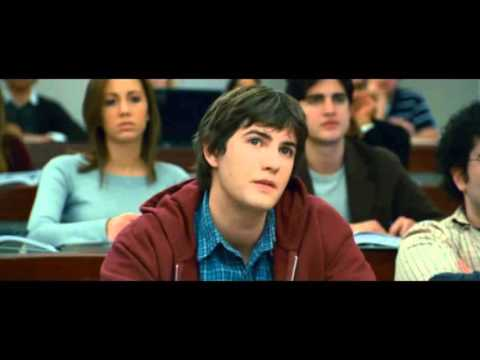

In [ ]:
#@title Monty Hall in popular culture

from IPython.display import YouTubeVideo
YouTubeVideo('iBdjqtR2iK4', width=600, height=400, start=72, end=153)

Let's solve this puzzle with ~~variable change~~ Bayes.
We have three types of events coming into play:
* $Ci$ - car is behind door $i$, e.g. $C2$ means that the car is behind $2$-nd door;
* $Pi$ - players chooses door $i$;
* $Hi$ - host opens the door $i$.

Before any choices are made we know that unconditional probability $P(Ci)=1/3$.
Suppose the player initially chooses the door $1$ ($P1$ event) and the host opened the door $3$ ($H3$ event).

What is the probability $P(C2 | P1, H3)$? We use the Bayes theorem to get


$$
\require{cancel}
P(C2 | P1, H3) = \frac{P(P1, H3|C2) \cdot P(C2)}{P(P1, H3)} =\frac{P(H3|P1, C2) \cdot \cancel{P(P1)}\cdot P(C2)}{P(H3|P1)\cdot\cancel{P(P1)}}=\frac{P(H3|P1, C2)\cdot P(C2)}{P(H3|P1)}=\frac{1\times1/3}{1/2}=2/3,
$$

where we have used the fact that $P(H3|P1, C2)=1$ as the host knows where the car is and deliberately opens the door with the goat behind it.
We have also used definition of conditional probability a couple of times.
Probability of the event that the car is behind door $2$ is now $2/3$ instead of $1/3$ that's why the best strategy is to switch your initial choice.

#Classification problem

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
classification
</font>

<font face="helvetica" color="black" size="3">

* Types: binary/multiclass
* This is ~~Sparta~~ supervised learning
* More complicated than it seems (dog-o-muffins problem, lecture 1)

</font>

<hr size="2" noshade="noshade" color="black"/>

Consider problem of classification: we have a "thing" that we should label with "tags". In other words we want to identify which of several categories an object belongs.
* Say we have a letter and the set of tags is $\{\text{spam},\neg \text{spam}=\text{ham}\}$. This is the example of binary classification.
* In an automotive app we want to determine whether an object is a car, a pedestrian or a sign. This is multiclass classification.
* We want to attribute person to a country he was born.
* We want attribute a person to a profession

In the terminology of machine learning, classification is considered an instance of supervised learning, i.e., learning where a training set of correctly identified observations is available. The corresponding unsupervised procedure is known as clustering, and involves grouping data into categories based on some measure of inherent similarity or distance.
An algorithm that implements classification, especially in a concrete implementation, is known as a classifier.

#Naive Bayes

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Naive Bayes
</font>

<font face="helvetica" color="black" size="3">

* Bayes is not alone ($P(f_i | C_k)$ = Gaussian, Multinomial, Bernoulli)
* Why so naive? (independence of features)
* Classifier = Model + Rule. Rules:
    - Maximum APosteriori (MAP)
    - Conditionl expectation
* We use Maximum APosteriori (MAP), Least Mean Squares uses conditional expectation

</font>

<hr size="2" noshade="noshade" color="black"/>

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about $10 \text{cm}$ in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In reality we have not one but a few random variables that characterize the thing we want to classify. Usually they are called features $f_1, \dots f_i, \dots f_N$. In Naive Bayes we assume that this features are independent.

$$P(f_1, \dots f_i, \dots f_N |C_k) = P(f_1 | C_k) \dots P(f_i | C_k) \dots P(f_N |C_k).$$

Suppose we want to use Bayes theorem to calculate the probability that our thing belongs to class $C_k$ given $f_1 = x_1, \dots f_i=x_i, \dots f_N=x_N$

$$P(C_k | x_1, \dots x_i, \dots x_N) = \frac{P(x_1 | C_k) \dots P(x_i | C_k) \dots P(x_N |C_k)\cdot P(C_k)}{P(x_1, x_2, \dots x_i, \dots x_N)}.$$


The denominator is just a scaling facor that doesn't depend on $C_k$. Let me it denote with $Z$.

$$P(C_k  | x_1, \dots x_i, \dots x_N) = \frac{\prod_{i=1}^{N}P(x_i | C_k)\cdot P(C_k)}{Z}.$$

In other words

$$P(C_k  | x_1, \dots x_i, \dots x_N) \propto P(C_k)\prod_{i=1}^{N}P(x_i | C_k).$$

Once we have probabilities that an object belongs to $C_k$ for any $k$ we need to decide what class do we actually assign our object to. What we were dealing up to now was Naive Bayes probability model. Now we need to choose the so called decision rule.

$$
\text{Naive Bayes classifier} = \text{Naive Bayes probability model} + \text{Decision rule}.
$$

One common rule is to pick the hypothesis that is most probable; this is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class index as follows:
$$
\hat{k} = \text{argmax}_{k=1,..,K}\, P(C_k)\cdot \prod_{i=1}^{N}P(x_i | C_k).
$$


In real world we do not know $P(x_i | C_k)$  -- we can make assumptions.
We could guess what kind of distribution that could be (e.g. Gaussian) but the parameters of that
distribution ares still unknown.

Depending on the $P(x | C_k)$ we adopt there are $3$ main types of Naive Bayes classifiers:
* Gaussian;
* Multinomial;
* Bernoulli.

Once we've made our mind on $P(x | C_k)$ that's where the training comes into play: we use the training set to estimate the parameters of that distribution and to determine $P(C_k)$.

Bayes classifiers are implemented in ```sklearn.naive_bayes```:
* **GaussianNB**;
* **MultinomialNB**;
* **BernoulliNB**;
* **ComplementNB**.








#Spam example

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Monty_Python_Live_02-07-14_13_04_42_%2814598710791%29.jpg/360px-Monty_Python_Live_02-07-14_13_04_42_%2814598710791%29.jpg)

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Spam filter by hands
</font>

<font face="helvetica" color="black" size="3">

* Find the probability that certain letter is spam basing on words it contains
* Simplest example -- consider one word
* Information needed:
  - fraction of letters expected to be spam
  - fraction of spam letters containing certain word

</font>

<hr size="2" noshade="noshade" color="black"/>

In [ ]:
#@title Simple spam classifier
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/simple_spam_classifier.svg'>
</img>

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Why is everything done the way it is?
</font>

<font face="helvetica" color="black" size="3">

* Why do we need **naive** Bayes? Ordinary Bayes could suffice.
  - Yes, ordinary Bayes could suffice, **BUT** it's highly probable you will not be able to manage that number of information.
    * Consider the simplest feature -- a word is present or absent in a text.
    * Consider a general purpose classifier. Common vocabulary contains approximately $20000$ words.
    * You will need $2^{20000}$ parameters $P(w_1,\dots,w_{N}|C)$.
    * Naive bayes needs only $20000$ parameters $P(w_1|C),\dots,P(w_N|C)$.
* Why do we need Bayes at all? Can't we store $P(C|w_1,\dots,w_{N})$?
  - Yes, we can, **BUT** we'll meet the same problem as storing $P(w_1,\dots,w_{N}|C)$.
* Why can't we store $P(C|w_1),\dots,P(C|w_N)$ and avoid using Bayes?
  - For independent features $w_1$ and $w_2$ you can write $P(w_1,w_2|C) = P(w_1|C) P(w_2|C)$, **BUT** you cannot write $P(C|w_1,w_2) = P(C|w_1) P(C|w_2)$.
    * **Counterexample.** Consider two independent features $w_1$ and $w_2$. Say $P(w_1) = \frac{1}{2}$,  $P(w_2) = \frac{1}{2}$, $P(w_1,w_2) = \frac{1}{4}$. Consider that $w_2$ perfectly classifies $C$, i.e. $P(w_2|C) = P(\neg w_2|\neg C) = 1$ and $P(\neg w_2|C) = P(w_2|\neg C) = 0$. Say that $w_1$ does not classify $C$ at all, i.e. $P(w_2|C) = P(\neg w_2|\neg C) = P(\neg w_2|C) = P(w_2|\neg C) = \frac{1}{2}$. We see that $P(w_1,w_2|C) = \frac{1}{4} = P(w_1|C) P(w_2|C)$. On the other hand $P(C|w_1,w_2) = 1$ because $w_2$ is true, but $P(C|w_1) p(C|w_2) = \frac{1}{2}$.
    
    
|$~$ | $w_1$ | $\neg w_1$|
|--|--|--|
|$w_2$|$C$ (25%)| $C$ (25%)|
|$\neg w_2$| $\neg C$ (25%) | $\neg C$ (25%) |

</font>

<hr size="2" noshade="noshade" color="black"/>


#Gaussian Naive Bayes

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Multidimensional Gaussian
</font>

<font face="helvetica" color="black" size="3">

* Independency
* Covariance matrix kicks in
* Gaussian states in QM/QO (quasiprobability distributions are Gaussian functions, $P$ here is Wigner function $W$ there)
  - coherent states, such as those from a laser
  - thermal states, as from a black body source
  - vacuum state

</font>

<hr size="2" noshade="noshade" color="black"/>

In [ ]:
#@title Multivariate Normal Distribution and Marginal Probabilities (відособлений розподіл)
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_marginal_probabilities.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.
Suppose we have continuous variable $x$ and classes $\{C_1, C_2, \dots, C_K\}$.
In 1D Gaussian Naive Bayes we presume that

$$P(f=x| C_k) = \frac{1}{\sqrt{2 \pi \sigma_{k}^2}}e^{-\frac{(x-\mu_k)^2}{2\sigma_{k}^2}}.$$

In 2D Gaussian Naive Bayes we presume that

$$P(f=\mathbf{x}| C_k) = \frac{1}{(2 \pi)^{{N/2}} |\Sigma_{k}|^{1/2}}e^{-(\mathbf{x}-\mathbf{\mu}_k)\Sigma_k^{-1}(\mathbf{x}-\mathbf{\mu}_k)},$$

where $\Sigma_k$ is covariance matrix and $\rho$ is correlation.








**conditioning**
$$
p_{X|Y}(x|y) = P(X=x|Y=y) = \frac{p_{X,Y}(x,y)}{p_Y(y)}, \quad p_Y(y) > 0
$$
Same for PDF. Multiplication rule
$$
f_{X|Y}(x|y) f_Y(y) = f_{X,Y}(x,y) = f_{Y|X}(y|x) f_X(x)
$$
thus
$$
f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
$$


In [ ]:
#@title Correlation
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/correlation.svg'>
</img>

Each class $C_k$ has its own average $\mathbf{\mu_k}$ and covariance matrix $\Sigma_k$ that are calculated on a training set with the help of the maximum likelihood method by the formulas

$$
\begin{aligned}
\mathbf{\mu}_k&=\frac{1}{N}\sum \mathbf{x}_{ki}, \\
\Sigma_k&=\frac{1}{N}\sum (\mathbf{x}_{ki}-\mathbf{\mu}_k)(\mathbf{x}_{ki}-\mathbf{\mu}_k)^{\top}.
\end{aligned}
$$

##1D  Example of Gaussian Naive Bayes

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
1D Gaussian Naive Bayes
</font>

<font face="helvetica" color="black" size="3">

* $2$ hidden distributions (red and blue)
* Generate datapoints
* Estimate distrubution parameters (scikit uses MLE, we will cover it the very next lecture)
* For every $\boldsymbol{x}$ find probability it is generated with red or blue Gaussian
* Do decision
* Practice contains dynamic demo

</font>

<hr size="2" noshade="noshade" color="black"/>

Suppose we want to classify points on the line. That is $N=1$, hence we have only one feature.

The tags we want to assign are colors $\{red, blue\}$. In fact we want to perform binary classification ($K=2$).

* We generate two arrays of points that are have normal distributions.

* Then we generate $200$ equidistant points and apply Gaussian Naive Bayes classifier.
We can take a look at posterior probabilities $[P(red|x),P(blue|x)]$ that NB assigns to out test points $X$.

* We use decision rule to choose the color with the highest probability. If both colors have equal large number of points in the training set NB splits colors in the points of intersections of their Gaussians.

In [ ]:
#@title Gaussian Naive Bayes for two classes
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_bayes_2d.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

##2D  Example of Gaussian Naive Bayes

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
2D Gaussian Naive Bayes
</font>

<font face="helvetica" color="black" size="3">

* 2 hidden 2D distributions (red and blue)
* Generate datapoints
* Use function GaussianNB()
* Plot how the plane is splitted
* Practice contains dynamic demo

</font>

<hr size="2" noshade="noshade" color="black"/>

Suppose we want to classify points on the $2D$ plane. As before $N=1$, hence we have only one feature.

The tags we want to assign are $\{red, blue\}$ again. We perform binary classification ($K=2$).

The probabilities $P(x | red)$ and $P(x | blue)$ are both Gaussians with std's equal to $1.5$.

We generate $100$ points in our training set.

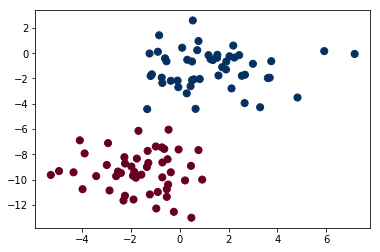

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

training_set, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(training_set[:, 0], training_set[:, 1], c=y, s=50, cmap='RdBu');

Choose Gaussian model for naive Bayes to fit the training set to the labels.

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(training_set, y);

Here is the result. We see a slightly curved boundary in the classifications—in general, the boundary in
Gaussian naive Bayes is quadratic.

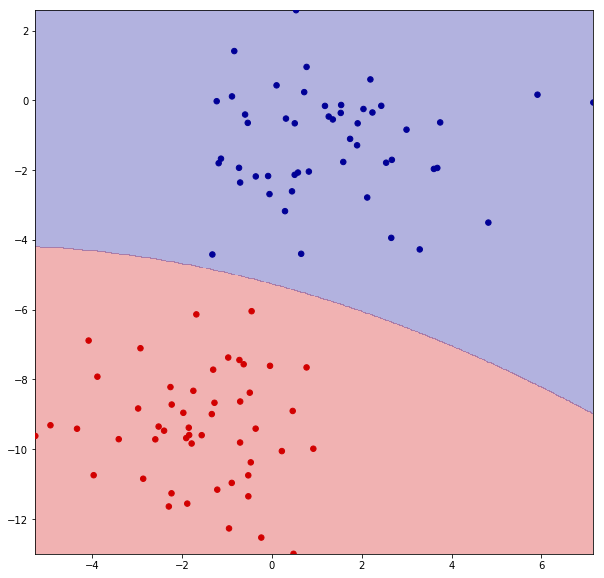

In [ ]:
#@title Visualize model and training set
import numpy as np
from matplotlib.colors import ListedColormap

def visualize(estimator, X, y):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()

  # Plot the training points
  rgb = [[210, 0, 0], [0, 0, 150], [107, 142, 35], [150, 0, 150], [220, 105, 0]]

  rgb=np.array(rgb)/255.
  ax.scatter(X[:, 0], X[:, 1], c=rgb[y], s=30, zorder=3)
  ax.axis('tight')
  xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
  ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

  # fit the estimator
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  n_classes = 5
  Z = Z.reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=ListedColormap(rgb), zorder=1)

  plt.close(fig)

  return fig

visualize(model, training_set, y)

As before we can take a look at posterior probabilities $[P(red|x),P(blue|x)]$ before decision rule is applied.

In [ ]:
y_predicted_P = model.predict_proba([[1, 2], [2, 3], [-4, -7], [0, -6], [2, -6], [4, -6]])
y_predicted_P.round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.46, 0.54],
       [0.03, 0.97]])

Now do the same with slightly better UI

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

def fit_model(training_set, y):
  model.fit(training_set, y);

def predict_result(X):
  return model.predict(X)

In [ ]:
#@title 2D Naive Bayes

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def visualize(X, y):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))

  # Plot the training points
  rgb = [[210, 0, 0], [0, 0, 150], [107, 142, 35], [150, 0, 150], [220, 105, 0]]

  rgb=np.array(rgb)/255.
  ax.scatter(X[:, 0], X[:, 1], c=rgb[y], s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, +1]
  ylim = [-1, +1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

  # fit the estimator
  xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
  Z = predict_result(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  n_classes = 5
  Z = Z.reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=ListedColormap(rgb), zorder=1)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 3))
  X = data[:, :2] / 300.0 - 1.0
  X[:, 1] *= -1.0
  y = data[:, 2]

  fit_model(X, y)
  fig = visualize(X, y)

  return IPython.display.JSON({'image': figure_to_base64(fig)})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var class_btn = [[650, 50], [650, 150], [650, 250], [650, 350], [650, 450]];
    var class_name = ["class A", "class B", "class C", "class D", "class E"];
    var class_color = ["rgba(210, 0, 0, 0.75)", "rgba(0, 0, 150, 0.75)",
         "rgba(107, 142, 35, 0.95)", "rgba(150, 0, 150, 0.75)", "rgba(220, 105, 0, 0.75)"]

    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = class_color[cls];
      ctx.fill();
    }

    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });

      }
    }

    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state.slice(0,3) == "add") {
        var class_idx = parseInt(state.slice(3,4), 10);
        if (x < 600)
            all_pts.push([x, y, class_idx]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  function getImageURL(class_idx)
  {
     var canvas = document.createElement('canvas');
     var ctx = canvas.getContext('2d');
     canvas.width  = 2.0 * ptR;
     canvas.height = 2.0 * ptR;
     circ(ctx, [ptR, ptR], class_idx);
     return canvas.toDataURL(); //image URL
  }

  </script>
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1a" name="rate" value="add0" checked="checked">
    <label for="r1a">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(0); "> Add class A
    </label>
    <br>
    <input type="radio" id="r1b" name="rate" value="add1">
    <label for="r1b">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(1); "> Add class B
    </label>
    <br>
    <input type="radio" id="r1c" name="rate" value="add2">
    <label for="r1c">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(2); "> Add class C
    </label>
    <br>
    <input type="radio" id="r1d" name="rate" value="add3">
    <label for="r1d">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(3); "> Add class D
    </label>
    <br>
    <input type="radio" id="r1e" name="rate" value="add4">
    <label for="r1e">
      <img src="" onerror="this.onerror=null; this.src = getImageURL(4); "> Add class E
    </label>
    <br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">
      Move data point
    </label>
    <br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">
      Delete data point
    </label>
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Invoke Bayes
    </button>
  </div>
  <script> init();</script>
'''

display(IPython.display.HTML(main_str))

output.register_callback('notebook.InvSVM', invoke)

##ROC and AUC

**Binary classifier with threshold** (almost all classifiers fall into this category)
* Most classifiers yield probability $p_A$ that datapoint $\vec{x}$ belongs to class $A$ (and $1 - p_A$ that it belongs to $B$).
* We set threshold $T$ such that model predicts $A$ if $p_A > T$ and $B$ otherwise.

* **Receiver operating characteristics (ROC)**

Curve similar to precision-recall curve, but instead false positive rate
$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
= \frac{\text{FP}}{\text{All verily Negatives}}
$$
and true positive rate
$$
\text{TPR} = \frac{\text{TP}}{\text{FN} + \text{TP}}
= \frac{\text{TP}}{\text{All verily Positives}}
$$

* **False Positive Rate** shows what percentage of cases that are negative were wrongly recognized as positive
* **True Positive Rate** shows what percentage of cases that are positive were recognized as such


In [ ]:
#@title ROC curve for Gaussian Naive Bayes
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/demo_roc_auc.html"
        width="1500" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

* **Precision-Recall curve**

- Simplest metric -- percent of correctly classified items
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
- Confusion matrix
- More complex metrics




In [ ]:
#@title Precision/Recall
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/precision_recall.svg'>
</img>

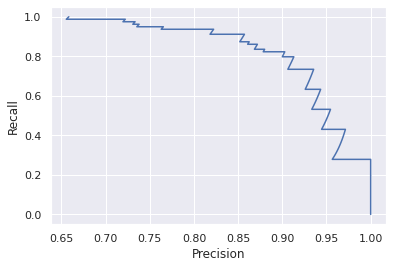

In [ ]:
#@title Precision-Recall curve

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=2, random_state=30, cluster_std=1.9)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC
svc = SVC(gamma=.05).fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision");
plt.ylabel("Recall");
#svc.decision_function(X_test).shape, X_test.shape

* **Be careful with using only one of these parameters**
   - Model that yieds true only has perfect recall equal $1$
   - Model that yields true for unique most probable datapoint and false otherwise has perfect precision equal $1$

* **Be careful with imbalanced datasets**

In a city with population 1M inhabitants live 100 terrorists. You create a model that detects terrorists and rings a bell. Testing the model you achieve following resuts:
(A) it confuses terrorist with non-terrorist with only 1% chance;
(B) it confuses non-terrorist with terrorist with only 1% chance;
Is this model good?

* $f$-score or $f$-measure is a bit better for imbalanced datasets
$$
F = 2~~ \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* **Mean Precision**

Calculated through integral of the precision-recall curve

* **Area Under Curve (AUC)**

Calculated as integral of ROC

#Text classification

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Text classification
</font>

<font face="helvetica" color="black" size="3">

* Steps:
  - calculate doc-type priors
  - estimate $p_{ki}$ (word $i$, doc-type $k$) by smoothed MLE (with pseudocounts), two approaches
    * multi-variate $Bernoulli$ (features are boolean frequencies(1,0) of words)
    * multinominal model (features are # of occurrences of words)
  - to classify a document find $P(\boldsymbol{x}|C_k)$, choose $k$ with the largest posterior probability
* Laplace smoothing ($\alpha = 1$)
* Example
* Better performance
  - TFIDF (term frequency inverse document frequency) removes "the"-"is" problem
  - Multinomial performs better on large docs
  
</font>

<hr size="2" noshade="noshade" color="black"/>

There are two approaches to documents classification:  multi-variate Bernoulli model and multinomial model.

Both of them start from a vocabulary of words (that can have thousands them).
Training set contains documents that are classified into categories.
For example out of $100$ of documents $100$ are labeled as $\q Physics \Q$, $200$ - as $\q Literature \Q$ and so on. Next step is to estimate $P(C_k)$ using empirical frequencies

$$
\begin{aligned}
&P(\q Physics \Q)\quad \,=\frac{100}{1000}=0.1,\\
&P(\q Literature \Q)=\frac{200}{1000}=0.2.
\end{aligned}
$$

These probabilities are statistical "stereotypes" that give us information about most likely category without any information about the document we want to classify.


Next step is to analyze the document and to determine what words in the vocabulary are contained in it. Multi-variate Bernoulli specifies that a document is represented by a vector of binary attributes indicating which words occur and do not occur in the document:

$$
\boldsymbol{x}=\{0,1,0,1\},
$$

for words $\{\q force \Q, \q love \Q, \q object \Q, \q poem \Q\}$.

When calculating the probability of a document, one multiplies probability of all attribute values, including the probability of non-occurrence for words that do not occur in the document.

$$
P(\boldsymbol{x}|C_k)=\prod_{i=1}^{N}p_{ki}^{x_i}(1-p_{ki})^{(1-x_i)},
$$

where $\boldsymbol{x}=\{x_1,\dots x_i \dots x_N\}$.

Multinomial approach specifies that a document is represented by the set of word occurrences from the document. As above, the order of the words is lost, however, the number of occurrences of each word in the document is captured.

$$
\boldsymbol{x}=\{3,0,3,1\}
$$

for words $\{\q force \Q, \q love \Q, \q object \Q, \q poem \Q \}$.

When calculating the probability of a document, one multiplies the probability of the words that occur.

 $$P(\boldsymbol{x}|C_k)=\frac{(\sum_i x_i)!}{\prod_{i} x_i!}\prod_i p_{ki}^{x_i}=|d|!\prod_{i=1}^N \frac{p_{ki}^{x_i}}{ x_i!},$$

 where $\boldsymbol{x}=\{x_1,\dots x_i \dots x_N\}$.

 We now see that features occurrences are independent (hence this method is naive).
 In both models parameters $p_{ki}$ are estimated from the training set.
 They are estimated using smoothed empirical frequencies (smoothed MLE estimators aka frequencies with pseudocounts).

 In Bernoulli:

 $$
 p_{ki}=\frac{\#\, of \, documents\, labeled \, \q k \Q \, with \, word \, \q i \Q \, in \, them +\alpha}{total\, \#\, of \, documents\, labeled \, \q k \Q+ \, 2\, \alpha}.
 $$

  In Multinomial:

  $$
 p_{ki}=\frac{\#\, of \, counts\, of\, word \,  \q i \Q\, in\, all \, documents \, labeled \, \q k \Q +\alpha}{\#\, of \, counts\, of \, all\, words\, in \, documents \, labels \, \q k \Q + \, \alpha N}.
 $$










In [ ]:
#@title Classification algo
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/text_classification.svg'>
</img>

Usually $\alpha =1$ (Laplace smoothing). In the advanced realizations "counts" are not just simple counts but rather so called $tf\text{-}idf$ counts adjusted for the relevance of words so that such abundant and meaningless words as "is" and "the" do not have sky-rocketing number of counts.

In [ ]:
#@title Physics or Literature?
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_07_naive_bayes/physics_or_literature.svg'>
</img>

In general, multinomial model performs better especially for the large vocabularies and large documents for classification.

#Multinomial Naive Bayes

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Multinomial Bayes
</font>

<font face="helvetica" color="black" size="3">

* Multinomial as generalization of binomial (previous lecture)
* Bag of words model
* Vectorizers
  - CountVectorizer (a number of times each word occurs in each document)
  - TfidfVectorizer (tf $\times$ idf)
     * tf -- term frequency (regular, boolean, log-scaled, augmented)
     * idf (entropy-like measure, many definitions, provide sklearn-implemented one)
  
</font>

<hr size="2" noshade="noshade" color="black"/>

##Example: Multinomial Naive Bayes


Have you heard about the Multinomial distribution before? This is the generalization on the Binomial distribution.
Suppose you pick $n=6$ balls from a big bag with red, blue and green balls ($N=3$).  You are given that the probability to pick red is $p_{\text{red}}=0.2$, blue — $p_{\text{blue}}=0.5$ and green — $p_{\text{green}}=0.3$. What is the probability to pick $3$ red, $2$ blue balls and $1$ green ball? You do not care about order of the appearance of the balls. The answer is given by the Multinomial distribution

$$P(\boldsymbol{x}=[3,2,1])=\frac{6!}{3! \times 2! \times 1!}0.2^{3}\times0.5^{2} \times0.1^{1}.$$

 Why is it called multinomial? It's related to the multinomial theorem that is the generalization of the binomial theorem:

 $$(p_1+p_2+\dots+p_N)^n=\sum_{i_1+i_2+\dots+i_N=n}\frac{n!}{i_1!i_2!\dots i_N!}\prod_{j=1}^N{p_{j}^{i_j}}.$$

 For example

 $$(0.2+0.5+0.3)^6=0.2^6\times0.5^0\times0.3^0 +\dots+\frac{6!}{3! \times 2! \times 1!}0.2^{3}\times0.5^{2} \times0.1^{1}+\dots+0.2^0\times0.5^0\times0.3^6. $$

Now you have the idea why in Multinomial Naive Bayes we choose

$$P(\boldsymbol{x}|C_k)=\frac{(\sum_i x_i)!}{\prod_i x_i!}\prod p_{ki}^{x_i},$$

where $\boldsymbol{x}$ is a vector of integers.


One place where Multinomial Naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. In fact we are pretending that a document is a placeholder where we place words drawn from the bag  (bag-of-words model).
Here we will use the sparse word count features from the $20$ Newsgroups corpus to show how we might classify these short documents into categories.
Let's download the data and take a look at the target names:

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

We will classify text into $K=4$ classes. We divide our data into training set ($\approx 2000$ documents) and validation set ($\approx 1000$ documents).

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
training_set = fetch_20newsgroups(subset='train', categories=categories)
validation_set = fetch_20newsgroups(subset='test', categories=categories)

Typical document looks like this.

In [ ]:
print(training_set.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. It's called a vectorization of a document. For this we will use the tf–idf vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Making pipelines
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_simple = make_pipeline(CountVectorizer(), MultinomialNB())

# Training models
model.fit(training_set.data, training_set.target);
model_simple.fit(training_set.data, training_set.target);

We can now use so called confusion matrix to visualize the result.
Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. We will see how it works.


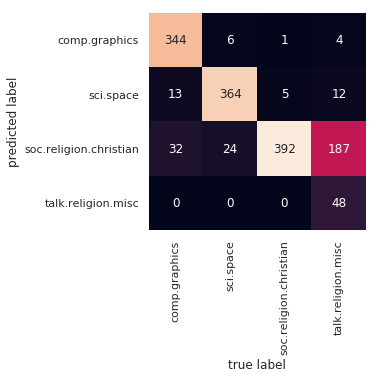

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = model.predict(validation_set.data)
mat = confusion_matrix(validation_set.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=validation_set.target_names, yticklabels=validation_set.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

But before we will talk about ```TfidfVectorizer``` consider simpler kind of vectorizer namely `CountVectorizer`.
`CountVectorizer` compiles vocabulary (words) from a corpus and counts a number of times each word occurs in each document. Vectorizer ignores punctuation marks such as colons and semicolons. It also converts all words to lowercase. Thus, vocabulary consists of all lowercased words that are present in the documents of the corpus.
Function `toarray()` returns the count matrix ($|corpus|\times|Vocabulary|$) with counts of every word in every document of the corpus.




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

print("_______________________COUNT VECTORIZER______________________________")
vectorizer_C = CountVectorizer()
C = vectorizer_C.fit_transform(corpus)
print("Vocabulary : ", vectorizer_C.get_feature_names())
print("Vocabulary size: ", len(vectorizer_C.get_feature_names()))
print("We had 4 documents and vocabulary has 9 words. That's why vectorizer has dimensions:", C.shape)
print("arr :\n", C.toarray())

%load_ext google.colab.data_table
import pandas as pd
pd.DataFrame(C.toarray(), columns=vectorizer_C.get_feature_names())

_______________________COUNT VECTORIZER______________________________
Vocabulary :  ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Vocabulary size:  9
We had 4 documents and vocabulary has 9 words. That's why vectorizer has dimensions: (4, 9)
arr :
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


The problem with `CountVectorizer` is that it contains many uninformative common words such as 'am', 'is', "the", that carry no information about the document class because they are present in every document.

In the ```TfidfVectorizer``` the simple counts of the words are substituted by Tf–idf or TFIDF, short for term frequency–inverse document frequency, a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
Suppose we have a document $d$, word $t$ and a collection of documents $D$. Then

$$tf\text{-}idf(t,d,D)=tf(t,d)\cdot idf(t,D)$$ where

* $tf(t,d)$ is term frequency that describes how common is the term in the document.
  - boolean "frequencies": $tf(t,d) = 1$ if $t$ occurs in $d$ and $0$ otherwise;
  - term frequency adjusted for document length: (counts of $t$ in $d$) ÷ (number of words in $d$)
  - logarithmically scaled frequency: $tf(t,d) =  \log (1 + \text{(counts of $t$ in $d$)})$
  - augmented frequency, to prevent a bias towards longer documents, e.g. raw frequency divided by the raw frequency of the most occurring term in the document: $tf(t,d) = 1/2 + 1/2 \cdot  \cfrac{\text{(counts of $t$ in $d$)}}{\text{(counts of maximum frequent term in $d$)}}$
* $idf(t,D)$ is the inverse document frequency equal to

$$
idf(t,D)=1+\log{\frac{|D|}{|\{d \in D \mid d \text{ contains } t\}|}}.
$$

The inverse document frequency is a measure of how much information the word provides, i.e., if it's common or rare across all documents. Its purpose is to filter out common words: words like "this" and "is" don't provide much information.
  - There are different formulas for $idf$, but this one is used in `sklearn` by default.


Here is how ```TfidfVectorizer``` works. As `CountVectorizer` it extracts unique words (features). It then constructs so called Tf-idf-weighted document-term matrix that for each word in each document calculates its $tf\text{-}idf$. Note that $tf\text{-}idf$ is more informative than simple counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

print("_______________________TFIDF VECTORIZER______________________________")
vectorizer_tfidf = TfidfVectorizer()
X = vectorizer_tfidf.fit_transform(corpus)
print("Vocabulary : ", vectorizer_tfidf.get_feature_names())
print("Vocabulary size: ", len(vectorizer_tfidf.get_feature_names()))
print("We had 4 documents and vocabulary has 9 words. That's why vectorizer has dimensions:", X.shape)
#print("arr :\n", X.toarray())
pd.DataFrame(X.toarray(), columns=vectorizer_tfidf.get_feature_names())

_______________________TFIDF VECTORIZER______________________________
Vocabulary :  ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Vocabulary size:  9
We had 4 documents and vocabulary has 9 words. That's why vectorizer has dimensions: (4, 9)


,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


Now we can fit our model and determine its parameters. Afterwords we can use this parameters and decision rule to make predictions.

What if we used simple count vectorizer?

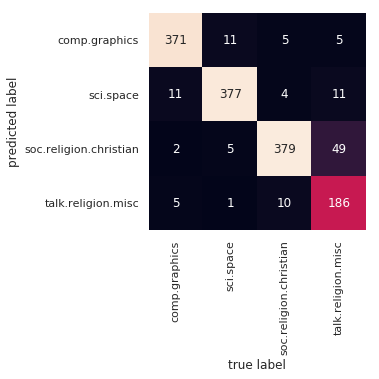

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels_simple = model_simple.predict(validation_set.data)
mat_simple = confusion_matrix(validation_set.target, labels_simple)
sns.heatmap(mat_simple.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=validation_set.target_names, yticklabels=validation_set.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

The very cool thing here is that we now have the tools to determine the category for any string, using the `predict()` method of this pipeline. Here's a quick utility function that will return the prediction for a single string:


In [ ]:
def predict_category(s, train=training_set, model=model):
  pred = model.predict([s])
  return training_set.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

#Bernoulli Naive Bayes

<hr size="2" noshade="noshade" color="black"/>

<font face="helvetica" color="black" size="6">
Bernoulli Bayes
</font>

<font face="helvetica" color="black" size="3">

* Binary variables (whether document contains a term or not)
* For large vocabularies worse than Multinomial
* To use set `binary = True` in tf-idf
* Guessing example
  
</font>

<hr size="2" noshade="noshade" color="black"/>

In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs.

$$
P(\boldsymbol{x}|C_k)=\prod_{i=1}^{N}p_{ki}^{x_i}(1-p_{ki})^{(1-x_i)}.
$$

For example when analyzing a document we can take into account not the number of occurences of a given word in a document but rather it's presence or absence (boolean frequency).
For large vocabularies Bernoulli Naive Bayes performs worse than Multinomial Naive Bayes.

Let's use Bernoulli Naive Bayes for the example above.
Note that we set `binary = True` in `TfidfVectorizer` to obtain boolean frequencies.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline

vectorizer_B = TfidfVectorizer(binary = True, use_idf = False, smooth_idf = False, norm=False)
b = vectorizer_B.fit_transform(corpus)
print("Vocabulary : ", vectorizer_B.get_feature_names())
print("Vocabulary size: ", len(vectorizer_B.get_feature_names()))
print("We had 4 documents and vocabulary has 9 words. That's why vectorizer has dimensions:", b.shape)

import pandas as pd
pd.DataFrame(b.toarray(), columns=vectorizer_B.get_feature_names())

Vocabulary :  ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
Vocabulary size:  9
We had 4 documents and vocabulary has 9 words. That's why vectorizer has dimensions: (4, 9)


,and,document,first,is,one,second,the,third,this
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Now test our classifier on a big dataset

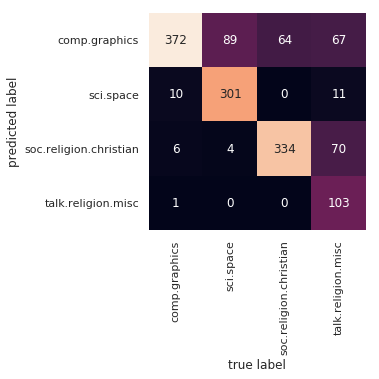

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model_B = make_pipeline(TfidfVectorizer(binary = True, use_idf = False, norm=False), BernoulliNB())
model_B.fit(training_set.data, training_set.target)
labels_B = model_B.predict(validation_set.data)

mat_B = confusion_matrix(validation_set.target, labels_B)
sns.heatmap(mat_B.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=validation_set.target_names, yticklabels=validation_set.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

##Example: Guessing binary outcomes

In [ ]:
ones_and_zeros = '''
1011010111101001010101010101001010101001010100101011100100101010101010101010101010101010101010101010101010101010101010101001101101101001010101001010101011010101010101010101010101010101010101100001010101010101010001001110100101
'''

In [ ]:
#@title Train code


import numpy as np

class Predictor():
  def __init__(self, Nmax, D):
    self.history = [0 for _ in range(D-1)]
    self.stats = np.ones(Nmax**D).reshape([Nmax]*D)
    self.D = D

  def best_guess(self):
    cond_stats = self.stats[tuple(self.history)] if self.D > 1 else self.stats
    guess = np.argmax(cond_stats)
    certainty = cond_stats[guess] / cond_stats.sum()
    return guess, certainty

  def update(self, num):
    if self.D <= 1:
      self.stats[num] += 1
    else:
      self.stats[tuple(self.history)][num] += 1
      self.history = self.history[1:] + [num]


class BayesGuesser:
  def __init__(self, Nmax):
    self.predictors = [Predictor(Nmax, D) for D in [1,2,3,4,5]]

  def best_guess(self):
    data = np.array([p.best_guess() for p in self.predictors]).T
    return int(data[0, np.argmax(data[1])])

    return self.predictors[np.argmax(self.guesses)].best_guess()

  def update(self, num):
    for p in self.predictors:
      p.update(num)


ones_and_zeros = ''.join(ones_and_zeros.split())
data = [int(i) for i in ones_and_zeros]

bg = BayesGuesser(10)
for e in data:
  bg.update(e)


In [ ]:
test = '''
0010101010101001001
'''

In [ ]:
#@title Test code

test = ''.join(test.split())
data = [int(i) for i in test]

stat_correct = 0
stat_missed = 0

for e in data:
  if bg.best_guess() == e:
    stat_correct += 1
  else:
    stat_missed += 1
  bg.update(e)

print("stats: correct = ", stat_correct, ", misses = ", stat_missed, ",  ", stat_correct / (stat_correct + stat_missed) * 100, "%")


In [ ]:
#@title Test with Buttons

import IPython
from google.colab import output

_const_guess = '''
<br> My guess is: %s <br>
<button onclick=\"google.colab.kernel.invokeFunction(\'notebook.Guessed\', [%s], {})\"> Correct </button>
<button onclick=\"google.colab.kernel.invokeFunction(\'notebook.Missed\', [%s], {})\"> No </button>
'''

stat_correct = 0
stat_missed = 0

def guessed_click(number):
  global stat_correct
  stat_correct += 1
  bg.update(int(number))
  do_guess()

def missed_click(number):
  global stat_missed
  stat_missed += 1
  bg.update(1 - int(number))
  do_guess()

def do_guess():
  number = bg.best_guess()
  output.clear()
  display(IPython.display.HTML(_const_guess % (str(number), str(number), str(number))))
  output.register_callback('notebook.Guessed', guessed_click)
  output.register_callback('notebook.Missed', missed_click)
  print("stats: correct = ", stat_correct, ", misses = ", stat_missed)

do_guess()

#Applications of Naive Bayes

**What are pros of Naive Bayes?**
*  It is are extremely fast for both training and prediction
*  It provides straightforward probabilistic prediction
*  It is often very easily interpretable
*  It has very few (if any) tunable parameters

**Where should we use Naive Bayes Classification?**
*  When the naive assumptions actually match the data (very rare in practice)
*  For very well-separated categories, when model complexity is less important
*  For very high-dimensional data, when model complexity is less important

**Industrial applications:**
* news classification
* faces/objects recognition
* spam detection (filthy spammers aware of Bayes spam filtering are trying to fool algorithm by so called Bayesian poisoning - addition of random (or even carefully selected) words that are unlikely to appear in a spam message and  cause the spam filter to believe the message to be legitimate.)
* medical diagnosis
* weather prediction

